<a href="https://colab.research.google.com/github/ank-d/Stock-Market-Prediction-Based-on-Stock-Data-and-News-Sentiment/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble  import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalMeta_Data.csv')
data = pd.read_csv('FinalMeta_Data.csv')

# data.head()
data=data[['High', 'Low', 'Open', 'Volume','Close','Polarity']]
# data.head()

modifyData=data['Close'].shift()
data['prev_close']=modifyData
modifyData=data['Open'].shift()
data['prev_open']=modifyData
modifyData=data['High'].shift()
data['prev_high']=modifyData
modifyData=data['Volume'].shift()
data['prev_volume']=modifyData
modifyData=data['Low'].shift()
data['prev_low']=modifyData
data.head()

,High,Low,Open,Volume,Close,Polarity,prev_close,prev_open,prev_high,prev_volume,prev_low
0,8951.799805,8888.650391,8943.700195,189900,8896.700195,0.000000,NaN,NaN,NaN,NaN,NaN
1,8914.750000,8867.599609,8898.950195,293600,8879.599609,0.333333,8896.700195,8943.700195,8951.799805,189900.0,8888.650391
2,8960.799805,8898.599609,8904.400391,205900,8945.799805,0.000000,8879.599609,8898.950195,8914.750000,293600.0,8867.599609
3,8992.500000,8879.799805,8982.849609,218800,8899.750000,-0.285714,8945.799805,8904.400391,8960.799805,205900.0,8898.599609
4,8907.099609,8860.099609,8883.500000,202600,8897.549805,-0.166667,8899.750000,8982.849609,8992.500000,218800.0,8879.799805


<Axes: >

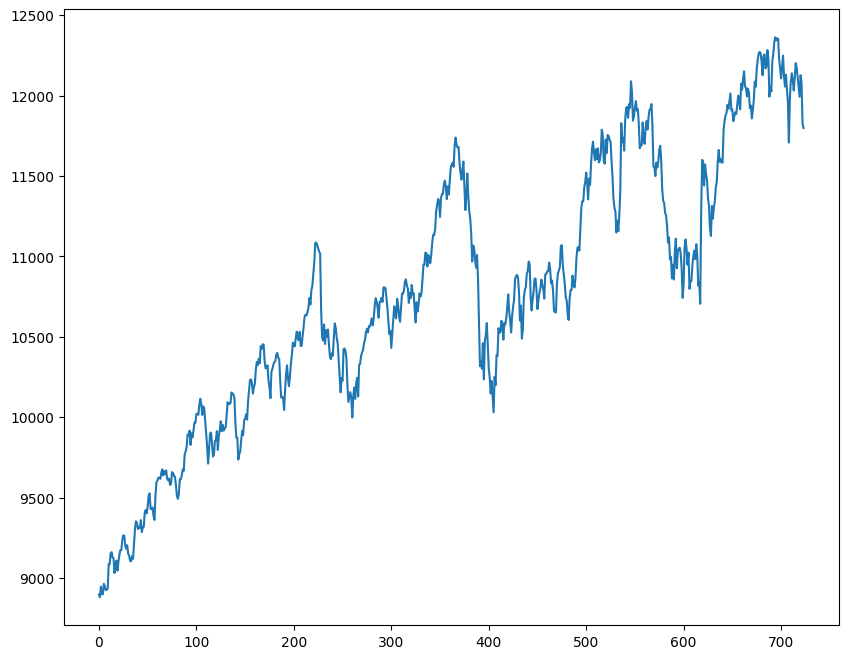

In [ ]:
data['Close'].plot(figsize=(10,8))

In [ ]:
# Drop rows with NaN values (due to shifting)
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 1 to 723
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         723 non-null    float64
 1   Low          723 non-null    float64
 2   Open         723 non-null    float64
 3   Volume       723 non-null    int64  
 4   Close        723 non-null    float64
 5   Polarity     723 non-null    float64
 6   prev_close   723 non-null    float64
 7   prev_open    723 non-null    float64
 8   prev_high    723 non-null    float64
 9   prev_volume  723 non-null    float64
 10  prev_low     723 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 67.8 KB


In [ ]:
# Define features and target variable
features = ['High', 'Low', 'Open', 'Volume']
target = 'Close'
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100,min_samples_leaf=2)
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)

#making predictions on traing set
predictions = model.predict(X_test)

# Print the first few predictions
print("Predictions:", predictions[:5])


Train R^2 Score: 0.9994961094214455
Test R^2 Score: 0.9975205189844716
Predictions: [10964.84528753 11660.02111196 10796.13610418  9121.55696094
 10865.14197861]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse: .2f}")
print(f"R-squared: {r_squared:.2f}")
# print("R-squared (R^2):", r_squared)

# Predict the closing price for the next day
# Assuming the last row of the dataset contains the most recent data
last_row = data[features].iloc[-1]
next_day_prediction = model.predict([last_row])[0]
print("Predicted Closing Price for Next Day:", next_day_prediction)

Mean Absolute Error (MAE): 30.79
Mean Squared Error (MSE):  1799.97
R-squared: 1.00
Predicted Closing Price for Next Day: 11823.653211728051


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Define the new set of features and the target variable
features2 = ['High', 'Low', 'Open', 'Volume','Polarity']
target = 'Close'

# Split data into training and testing sets using the new features
X_train2, X_test2, y_train2, y_test2 = train_test_split(data[features2], data[target], test_size=0.2, random_state=42)

# Initialize and train the model with the new features
model2 = RandomForestRegressor(n_estimators=100,min_samples_leaf=2)
model2.fit(X_train2, y_train2)

# Evaluate the model
train_score2 = model2.score(X_train2, y_train2)
test_score2 = model2.score(X_test2, y_test2)

print("Train R^2 Score with features2:", train_score2)
print("Test R^2 Score with features2:", test_score2)

# Make predictions on the testing set using the new features
predictions2 = model2.predict(X_test2)


# Print the first few predictions
print("Predictions_2:", predictions2[:5])



Train R^2 Score with features2: 0.999499916950143
Test R^2 Score with features2: 0.9975735440723262
Predictions_2: [10962.72044187 11663.15844789 10805.1251798   9120.91694963
 10871.71380238]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE) with the new features
mae2 = mean_absolute_error(y_test2, predictions2)

# Calculate Mean Squared Error (MSE) with the new features
mse2 = mean_squared_error(y_test2, predictions2)

# Calculate R-squared (R^2) with the new features
r_squared2 = r2_score(y_test2, predictions2)

# Print evaluation metrics with the new features
print("Mean Absolute Error (MAE) with features2: {:.3f}".format(mae2))
print("Mean Squared Error (MSE) with features2: {:.3f}".format(mse2))
print("R-squared (R^2) with features2: {:.3f}".format(r_squared2))

# Calculate the model score on the testing set with the new features
test_score2 = model2.score(X_test2, y_test2)
print("Model Score (R^2) on Testing Set with features2:", test_score2)

# Predict the closing price for the next day using the new features
# Assuming the last row of the dataset contains the most recent data
last_row2 = data[features2].iloc[-1]
next_day_prediction2 = model2.predict([last_row2])[0]
print("Predicted Closing Price for Next Day with features2:", next_day_prediction2)


Mean Absolute Error (MAE) with features2: 30.929
Mean Squared Error (MSE) with features2: 1761.481
R-squared (R^2) with features2: 0.998
Model Score (R^2) on Testing Set with features2: 0.9975735440723262
Predicted Closing Price for Next Day with features2: 11812.820088216147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


PLOT OF WITH POLARITY SCORE AND WITHOUT POLARITY SCORE

In [ ]:

import matplotlib.pyplot as plt

# x=data[features]
# z=data[features2]
# predicted=model.predict(x)
# predictedY=model2.predict(z)

# y=data[target]

# plt.figure(figsize=(10, 8))
# plt.plot(y,label='Actual')
# plt.plot(predicted,label='Predicted')
# plt.plot(predictedY,label='Predicted with Polarity Score')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title("Comparative Study")
# plt.legend()
# plt.show()

import plotly.graph_objects as go

# Assuming you have already imported data, features, features2, model, model2, and target
x=data[features]
z=data[features2]
# Make predictions
predicted = model.predict(x)
predictedY = model2.predict(z)
y=data[target]
# Create a Plotly figure
fig = go.Figure()

# Add traces for actual, predicted, and predicted with polarity score
fig.add_trace(go.Scatter(x=data.index, y=y, mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=data.index, y=predicted.flatten(), mode='lines', name='Predicted'))
fig.add_trace(go.Scatter(x=data.index, y=predictedY.flatten(), mode='lines', name='Predicted with Polarity Score'))


# Update layout for better readability
fig.update_layout(
    title="Comparative Study",
    xaxis_title="Index",
    yaxis_title="Value",
    autosize=False,
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
)

# Show the plot
fig.show()
